# TMDB Movies Rating Analysis

Welcome to this Jupyter notebook where we will explore and analyze the TMDB Movies Rating dataset. This notebook is designed to be a perfect starting point for other data scientists to fork and build upon. Let's dive into the data and see what interesting insights we can uncover!

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")

In [4]:
# Load the dataset
file_path = '/kaggle/input/moviesrating-on-tmdb/moviesrating.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,205321,Sharknado,"A freak hurricane hits Los Angeles, causing ma...",2013-07-11,16.260,3.916,1533
1,1,238930,Brain Drain,"Five deadbeat, sex-crazed friends forge their ...",2013-11-21,10.339,3.900,429
2,2,9760,Epic Movie,"When Edward, Peter, Lucy and Susan each follow...",2007-01-25,30.918,3.857,1488
3,3,94365,The Human Centipede 3 (Final Sequence),Taking inspiration from The Human Centipede fi...,2015-05-22,43.447,3.772,740
4,4,9544,FearDotCom,When four bodies are discovered among the indu...,2002-08-09,25.481,3.724,348


## Data Preprocessing

Let's start by checking for any missing values and understanding the basic statistics of the dataset.

In [5]:
# Check for missing values
df.isnull().sum()

Unnamed: 0      0
id              0
title           0
overview        1
release_date    0
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [6]:
# Basic statistics of the dataset
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,9538.000000,9.538000e+03,9538.000000,9538.000000,9538.000000
mean,4768.500000,1.879849e+05,44.908659,6.607695,1963.136926
std,2753.527768,2.497216e+05,80.221227,0.839111,3085.424155
min,0.000000,2.000000e+00,0.039000,2.200000,300.000000
25%,2384.250000,1.006925e+04,22.937000,6.100000,466.000000
50%,4768.500000,3.648800e+04,31.064000,6.651000,841.000000
75%,7152.750000,3.410105e+05,45.990750,7.200000,1957.750000
max,9537.000000,1.212073e+06,3444.493000,8.705000,35908.000000


## Data Visualization

Let's create some interesting charts to visualize the data.

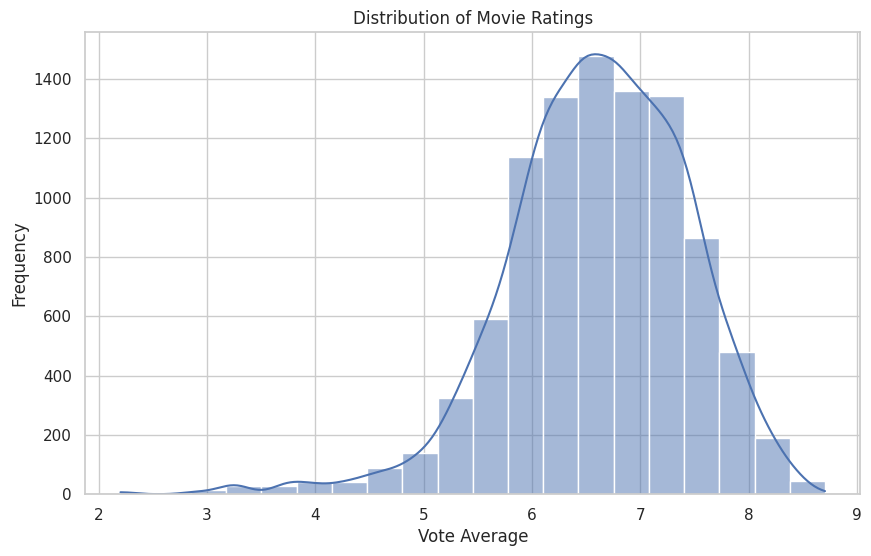

In [7]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Relationship between popularity and vote average
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

In [ ]:
# Top 10 movies by vote count
top_10_movies = df.nlargest(10, 'vote_count')
plt.figure(figsize=(12, 8))
sns.barplot(x='vote_count', y='title', data=top_10_movies)
plt.title('Top 10 Movies by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.show()

## Predictive Analysis

Given the data, it would be interesting to predict the vote average of a movie based on its popularity and vote count. Let's build a simple linear regression model to do this.

In [ ]:
# Prepare the data for modeling
X = df[['popularity', 'vote_count']]
y = df['vote_average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

## Future Analysis Ideas

1. **Genre Analysis**: If genre data is available, analyze how different genres affect movie ratings and popularity.
2. **Time Series Analysis**: Explore how movie ratings and popularity have changed over time.
3. **Sentiment Analysis**: Perform sentiment analysis on movie overviews to see if there's a correlation between sentiment and ratings.
4. **Advanced Predictive Models**: Experiment with more advanced models like Random Forest, Gradient Boosting, or Neural Networks to improve prediction accuracy.
5. **User Demographics**: If user demographic data is available, analyze how different demographics rate movies.

Feel free to fork this notebook and build upon these ideas. Happy analyzing!

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)